<a href="https://colab.research.google.com/github/DylanML/Sentiment-Analysis/blob/main/An%C3%A1lisis_de_Sentimiento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [18]:
df = pd.read_excel('wikipedia dataset.xlsx')

In [19]:
df.head(1000)

,id,comment_text
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It..."
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ..."
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember..."
...,...,...
995,02b8e9f1f138d728,""" Hi, Writingrights, Welcome to Wikipedia! \n..."
996,02b90e56ec25a4c1,It is common knowledge that Karaims (but not K...
997,02b91acc085c26f8,", 12 April 2006 (UTC)\nThen rewrite and expand..."
998,02b94ce316048bc1,"""I was trying to inject some humour (as eviden..."


In [20]:
def get_subjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def get_polarity(text):
  return TextBlob(text).sentiment.polarity

In [21]:
df['Subjectivity'] = df['comment_text'].apply(get_subjectivity)
df['Polarity'] = df['comment_text'].apply(get_polarity)

df.head(1000)

,id,comment_text,Subjectivity,Polarity
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0.454545,0.136364
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0.550000,0.287500
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0.406667,0.160000
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0.301042,0.200000
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0.000000,0.000000
...,...,...,...,...
995,02b8e9f1f138d728,""" Hi, Writingrights, Welcome to Wikipedia! \n...",0.582626,0.188580
996,02b90e56ec25a4c1,It is common knowledge that Karaims (but not K...,0.350000,0.025000
997,02b91acc085c26f8,", 12 April 2006 (UTC)\nThen rewrite and expand...",0.383333,0.101786
998,02b94ce316048bc1,"""I was trying to inject some humour (as eviden...",0.600000,-0.175962


In [22]:
def sentiment(score):
  if score < 0:
    return 'Negativo'
  elif score == 0:
     return 'Neutral'
  else:
     return 'Positivo'

In [23]:
df['Resultado'] = df['Polarity'].apply(sentiment)
df.head(1000)

,id,comment_text,Subjectivity,Polarity,Resultado
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0.454545,0.136364,Positivo
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0.550000,0.287500,Positivo
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0.406667,0.160000,Positivo
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0.301042,0.200000,Positivo
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0.000000,0.000000,Neutral
...,...,...,...,...,...
995,02b8e9f1f138d728,""" Hi, Writingrights, Welcome to Wikipedia! \n...",0.582626,0.188580,Positivo
996,02b90e56ec25a4c1,It is common knowledge that Karaims (but not K...,0.350000,0.025000,Positivo
997,02b91acc085c26f8,", 12 April 2006 (UTC)\nThen rewrite and expand...",0.383333,0.101786,Positivo
998,02b94ce316048bc1,"""I was trying to inject some humour (as eviden...",0.600000,-0.175962,Negativo


In [24]:
df.to_excel('wikipedia.xlsx')

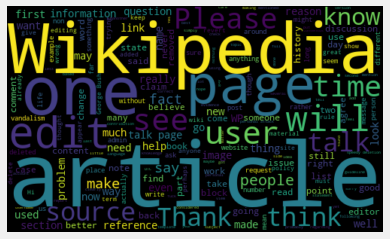

In [25]:
all_words = ' '.join( [twts for twts in df['comment_text']])
word_Cloud = WordCloud(width=500, height=300, random_state=21, max_font_size=119).generate(all_words)

plt.imshow(word_Cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

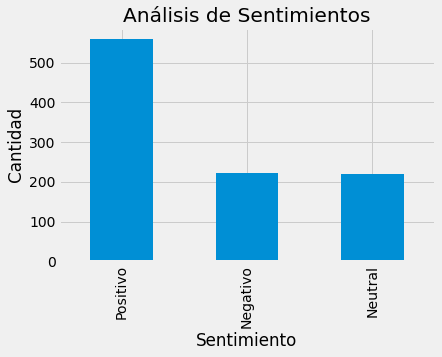

In [26]:
df['Resultado'].value_counts()

plt.title('Análisis de Sentimientos')
plt.xlabel('Sentimiento')
plt.ylabel('Cantidad')
df['Resultado'].value_counts().plot(kind='bar')
plt.show()